In [6]:
import numpy as np
import pandas as pd
from google.colab import files
from IPython.display import Image

import os
import glob
import sys
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout

from keras.optimizers import Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [8]:
#Binary
train_2 = '/content/drive/My Drive/Binary-Class X-Ray Images DataSet/train'
test_2 = '/content/drive/My Drive/Binary-Class X-Ray Images DataSet/test'

In [9]:
#Multi-Class
train_3 = '/content/drive/My Drive/Multi-Class X-Ray Images DataSet/train'
test_3 = '/content/drive/My Drive/Multi-Class X-Ray Images DataSet/test'


- Imbalanced Dataset 

    Covid 125 Images

    Pneumonia 500 Images

    No Findings 500 Images

- Pre-trained Networks ->  Transfer Learning -> Inception
- DarkNet Architecture

file:///D:/Downloads/Automated%20Detection%20of%20Covid%2019%20Cases%20using%20Deep%20Neural%20Networks%20with%20X-ray%20Images%20Paper.pdf

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_2,  
        target_size=(256, 256),  
        batch_size=5,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_2,
        target_size=(256, 256),
        batch_size=5,
        class_mode='binary')

Found 510 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


In [13]:
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

In [14]:
#Bianry Classification
#17 Conv Layers

model = Sequential()

model.add(Convolution2D(8, kernel_size = (3,3), padding='same',input_shape = (256,256,3)))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(16, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(32, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(32, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(64, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(64, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(128, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(256, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(128, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(256, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(128, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(256, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Convolution2D(2, kernel_size = (3,3), padding='same'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))

model.add(Flatten())

model.add(Dense(338 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 8)       1024      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 16)      0

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=102,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose =2
      )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
102/102 - 155s - loss: 0.4877 - accuracy: 0.8039 - val_loss: 0.6789 - val_accuracy: 0.8000
Epoch 2/20
102/102 - 87s - loss: 0.4169 - accuracy: 0.8157 - val_loss: 0.4021 - val_accuracy: 0.8160
Epoch 3/20
102/102 - 86s - loss: 0.4127 - accuracy: 0.8059 - val_loss: 2.0807 - val_accuracy: 0.8000
Epoch 4/20
102/102 - 87s - loss: 0.3888 - accuracy: 0.8392 - val_loss: 0.5206 - val_accuracy: 0.8080
Epoch 5/20
102/102 - 87s - loss: 0.3821 - accuracy: 0.8353 - val_loss: 0.8543 - val_accuracy: 0.8320
Epoch 6/20
102/102 - 87s - loss: 0.3478 - accuracy: 0.8549 - val_loss: 0.7687 - val_accuracy: 0.3920
Epoch 7/20
102/102 - 86s - loss: 0.3184 - accuracy: 0.8804 - val_loss: 0.4935 - val_accuracy: 0.6880
Epoch 8/20
102/102 - 86s - loss: 0.3077 - accuracy: 0.8784 - val_loss: 0.4972 - val_accuracy: 0.8880
Epoch 9/20
102/102 - 86s - loss: 0.3147 - accuracy: 0.8843 - val_loss: 0.1941 - val_accuracy: 0.9520
Epoch 10/20
10

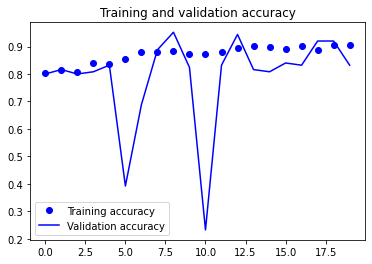

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Training and Validation Accuracy

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
plt.figure()
plt.show()

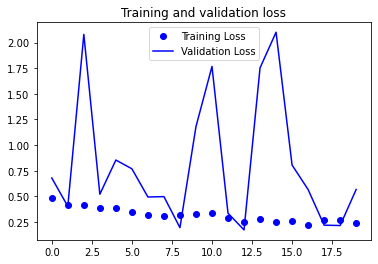

In [22]:
# Training Loss and Validation Loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
plt.show()

In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=102,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=25,
      verbose =2
      )

Epoch 1/100
102/102 - 88s - loss: 0.2425 - accuracy: 0.9118 - val_loss: 0.5990 - val_accuracy: 0.8480
Epoch 2/100
102/102 - 87s - loss: 0.2362 - accuracy: 0.8961 - val_loss: 0.1955 - val_accuracy: 0.9440
Epoch 3/100
102/102 - 87s - loss: 0.2125 - accuracy: 0.9078 - val_loss: 0.1843 - val_accuracy: 0.9280
Epoch 4/100
102/102 - 86s - loss: 0.2437 - accuracy: 0.9216 - val_loss: 0.8971 - val_accuracy: 0.8480
Epoch 5/100
102/102 - 87s - loss: 0.2158 - accuracy: 0.9176 - val_loss: 0.2121 - val_accuracy: 0.9520
Epoch 6/100
102/102 - 86s - loss: 0.2163 - accuracy: 0.9196 - val_loss: 1.9059 - val_accuracy: 0.4480
Epoch 7/100
102/102 - 87s - loss: 0.2413 - accuracy: 0.9118 - val_loss: 1.1159 - val_accuracy: 0.6480
Epoch 8/100
102/102 - 86s - loss: 0.2070 - accuracy: 0.9412 - val_loss: 0.3854 - val_accuracy: 0.8560
Epoch 9/100
102/102 - 87s - loss: 0.2290 - accuracy: 0.9176 - val_loss: 0.1333 - val_accuracy: 0.9680
Epoch 10/100
102/102 - 87s - loss: 0.1984 - accuracy: 0.9255 - val_loss: 0.6331 - 

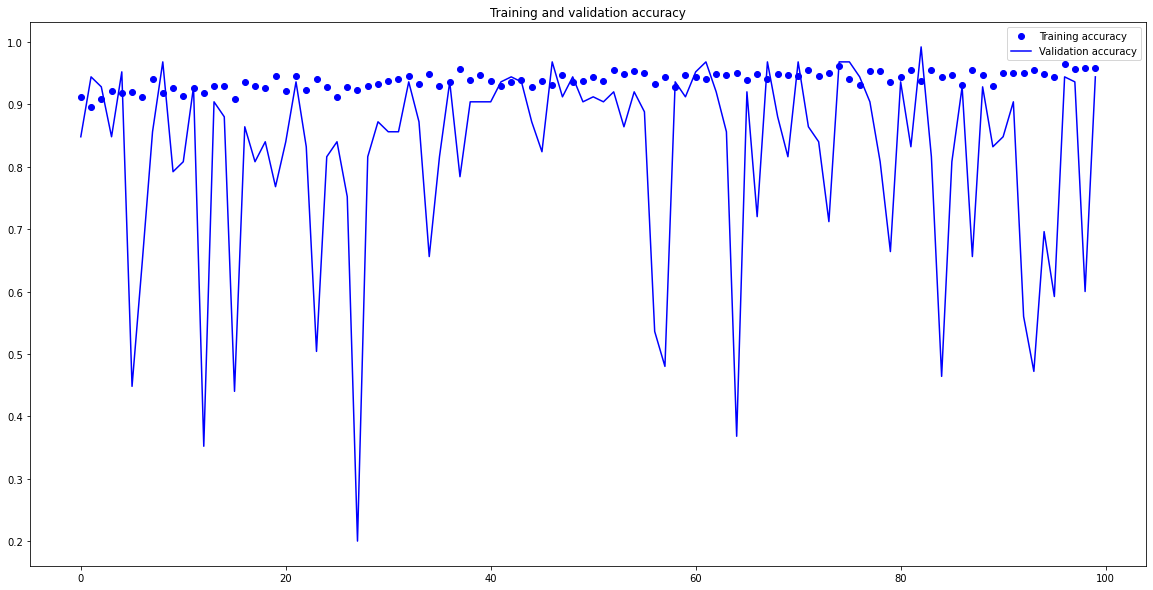

<Figure size 1440x720 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Training and Validation Accuracy

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

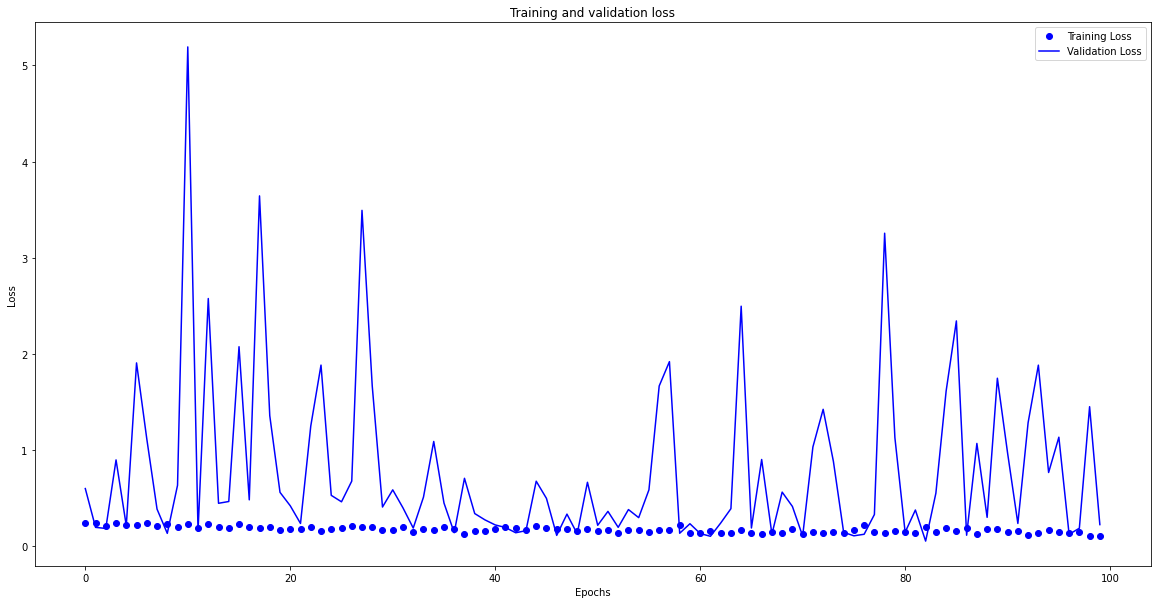

<Figure size 1440x720 with 0 Axes>

In [35]:
# Training Loss and Validation Loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.show()